# Classical Statistical Inference: Part 1

## Table of Content:

- I. [Basic probability concepts](#I)    
    * I.1 [Probability Axioms](Basic-statistics_01_Expanded.ipynb)
    * I.2 [What is a random variable ?](#I.2-What-is-a-random-variable-?)
    * I.3 [What is a conditional probability $p(A|B)p(A | B)$ and Bayes theorem ?](#I.3-What-is-a-conditional-probability-$p(A-|-B)$-and-Bayes-theorem?)
    * I.4 [What is a probability density function ?](#pdf)
    * I.4b [Bivariate PDF](#bivariate)
    * I.5 [What is a cumulative density function ?](#I.4-What-is-a-cumulative-density-function-?)
    * I.6 [Working with pdf and CDF](Basic-statistics_02.ipynb)


- [Descriptive statistics](#Intermezo:-Descriptive-statistics)
    * To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    
    * To **better understand visually the link between PDF and CDF**, and do an interactive tour of the characteristics and properties of **common distributions** encountered in science, then, run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

- X. [References and supplementary material](#X)

In [1]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## 0. Why some statistics ? 

With this lecture, we aim to give you tools to manipulate data (from observations or from simulations). Data, even when being the outcome of some deterministic process, contain a stochastic component, for example due to the observational device. This means that in essence, data are what statisticians call a **random variable**. This is why, when you report measurements you also need to report some uncertainties. These uncertainty calculation look often to student like some kind of black magic. This also means that they are sometimes not adequately used or reported. We'll clarify in the coming lectures, how to make those calculations using python tools. 

This is a necessary step to enter into the field of machine learning. If you look on Wikipedia at the page dedicated to [Machine learning](https://en.wikipedia.org/wiki/Machine_learning), you'll find the following definition: "Machine learning is the study of computer algorithms that improve automatically through experience. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so." This is not the result of black magic, but of well understood statistic and probability. 

## I Basic (probability) concepts:  <a class="anchor" id="I"></a>

This section aims at reminding us some definitions and notations, so everybody is on the same page. Illustration with python will also be provided. 

In probability theory, we define the following:
- the set of all possible outcomes of an experiment is generally called **sample space** and denoted, $\Omega$. 
- Points in $\Omega$, are called **realisations** $\omega$. In other words each of your *data point* is a realisation (but there may exist other  realisations that are not in your data). 
- An **Event** is a subset of $\Omega$ (i.e. a subsample of the $\omega$). In other words your *data set* is an event.  
- $p(A)$ is the **probability** of an event A. ($p(A)$ can also refer to a probability that a value of $x$ falls in a d$x$ wide interval around $x$. )

> The *frequentist (classical) interpretation of statistics*: You make a measurement, you repeat it an infinite number of times, and build a histogram. This histogram gives the relative frequency of getting a measurement compared to another. This relative frequency is what we call a probability. The whole possible outcomes of an experiment is called sample space $\Omega$. An event is a subsample of $\omega$ / is an ensemble of realisations (your data set).

**Example**: We measure the magnitude $m$ of a variable star. Then $\Omega = {\rm I\!R}$ (or some plausible range such as $]-30, 40 [ $, but this makes little difference in practice and $\Omega$ can in general be larger than needed). $\omega$ is a value in $\Omega$. While an event is the ensemble of magnitude measurements  that are e.g. such that $m_i > 15$ and $m_i <=15.5$, hence this *event* is A = ]15, 15.5]. Note that an event *can* also be a single point (i.e. A = [17.]). 

If you need some refresh on basic probability concepts, move to the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook. 

### I.1 Probability axioms

Check the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook to refresh your mind about the axioms behind the probability theory. 

### I.2 What is a random variable ?

Definition (informal): 

> A random variable is a variable whose value results from the measurement of a quantity that is subject to random variations. 

**Example:** You roll a dice. You can then define $X(\omega)$ be the *number of times you draw an even number* in a sequence $\omega$. Imagine you have rolled your dice 10 times, and get  $\omega = {1, {\bf 2, 4, 2}, 5, {\bf 4, 6}, 3, 3, 1 }$. Then $X(\omega) = 5$ is the value taken by your *random variable* X. 

Note that you can have either *continuous* or *discrete* random variables. If they form a countable set, they are discrete. They are continuous otherwise. 

**Warning**, a random variable is *NOT* like typical mathematical variables as it can take *different values* (each with an associated probability). In litterature, you will generaly find random variables written with *CAPITAL* letters, and their particular *realization* with *lowercase*. A realisation of a random variable is also called "random variate". 

**Random variable with numpy**

In numpy there is a sub-module called random that contains many functions that involve random selection. In particular there is a function `choice` that allows you to make a choice at random. It picks one item at random from an array, and it is equally likely to pick any of the items. The function call is `np.random.choice(array_name)`, where `array_name` is the name of the array from which to make the choice.

In [5]:
# Let's build a small array with classification of objects on a CCD: 
class_phot = np.array(['star', 'galaxy', 'galaxy', 'star', 'star'])
np.random.choice(class_phot)

'star'

If you re-rerun the above cell multiple times, you will see that the output changes, because the output is taken at random. If you provide a second argument (`size = n`), it will repeat the process $n$ number of times. In practice, this `method` allows you to *generate a random sample* from a 1-D array. You can add a third argument that specifies if you allow replacements or not as the output: i.e. `replace=False` means that the value stored at a given index of the array will only appear once in the output. 

In [9]:
np.random.choice(class_phot, size=3) 

array(['galaxy', 'galaxy', 'star'], dtype='<U6')

In [3]:
# Use e.g. np.arange(5) and size=5 to compare the behaviour with replace=True / replace = False
# It allows the replacement, we can pick the same value several times
my_array = np.arange(5)
np.random.choice(my_array, size=5, replace=True)

array([3, 1, 0, 2, 2])

In [4]:
# Here, once a variable is chosen, it won't be chose another time
np.random.choice(my_array, size=5, replace=False)

array([2, 3, 1, 0, 4])

In [5]:
#Try out with an array size > size of the random sample 
np.random.choice(my_array, size=7, replace=True)

array([4, 4, 3, 2, 0, 1, 1])

In [17]:
# If we don't allow replacement, it won't work
np.random.choice(my_array, size=7, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
# If size > size(a), you cannot generate a random sample with choice and replace=False (it does not make sense)

Other important methods of `np.random` are:
- `np.random.seed(value)`: Set the seed of the random number generator (allows to get reproductible results)
- `np.random.rand(shape)`: generate an array populated with random floats drawn from an uniform distribution. 
- `np.random.randint(low, high, shape)`: generate an array of random integers between `low` and `high` values. 
- `np.random.permutation(array_name)`: return a copy of the original array with elements permuted along the first axis of the array. 

##### Exercise: Coin toss

Create a 2D array of 10 rows and 7 columns (with random integer values). 
- (1) Use `choice` to select at random 5 different rows. 
- (2) Use `choice` to select at random 3 different columns.
- (3) Create an 1-D array representing result of 1000 coin toss (set value `0` for head and `1` for tail using random integers generator). Plot the histogram of their values (using `matplotlib.pyplot.hist`; Note that you can set the number of bins by setting the argument `bins = value`). Set the argument `density` of `hist()` to values True and False. What is the difference of behaviour ? 
- (4) Fix the seed of your random generator. Create an array `a` of 10 random integers between 0 and 10. Redo this operation and save it into an array `b`. Compare `a` and `b`. How should you proceed to have 2 identical arrays ? 

In [40]:
# Create a 2D array 
my_array = np.random.randint(0, 51, size=(10,7))
my_array

array([[26,  7, 37, 46, 16, 30, 37],
       [13, 45, 10, 27, 23, 26, 12],
       [ 4, 27,  2, 19, 23, 26, 48],
       [50, 27, 50, 29,  4, 15,  4],
       [46, 22, 25,  3, 40, 41, 37],
       [47, 25, 15, 19, 20,  5, 16],
       [ 1, 17, 21, 17, 30, 50,  8],
       [30, 50, 28, 19, 21,  0, 17],
       [19, 12, 45, 48, 33, 22, 13],
       [50, 22,  4, 25,  6, 18, 47]])

In [43]:
# Select at random 5 different rows
rows = np.arange(0,10)
random_rows = np.random.choice(rows, size=5, replace=False)
random_rows

array([8, 3, 4, 5, 9])

In [44]:
# Select 3 columns ids
col = np.arange(0,7)
random_columns = np.random.choice(col, size=3, replace=False)
random_columns

array([1, 2, 5])

In [ ]:
# (3) 1D array representing 1000 coin toss and histogram. 

(array([489., 511.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

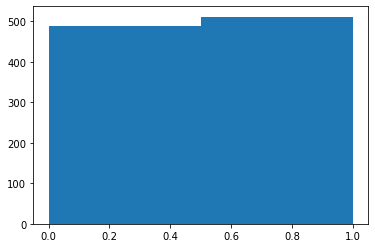

In [51]:
coin = np.random.randint(0, 2, size=1000)
plt.hist(coin, bins=2, density=False)

In [ ]:
# Permutations of the first row of the original array 

In [54]:
# (4) Fix the seed of your random generator. Create an array `a` of 10 integers between 0 and 10. 
# Redo this operation and save it into an array `b`. Compare `a` and `b`. 
np.random.seed(10)
a = np.random.randint(0, 11, size=10)
b = np.random.randint(0, 11, size=10)
a, b

(array([ 9,  4,  0,  1,  9,  0,  1, 10,  8,  9]),
 array([ 0, 10,  8,  6,  4,  3,  0,  4,  6,  8]))

In [55]:
#How should you proceed to have 2 identical arrays ? We have to give the seed everytime we have to define a random array
np.random.seed(10)
a = np.random.randint(0, 11, size=10)
np.random.seed(10)
b = np.random.randint(0, 11, size=10)
a, b

(array([ 9,  4,  0,  1,  9,  0,  1, 10,  8,  9]),
 array([ 9,  4,  0,  1,  9,  0,  1, 10,  8,  9]))

### I.3 What is a conditional probability $p(A | B)$ and Bayes theorem? 

The conditional probability expresses the fact that the probability of an event can depend on another one. For example, you may wonder what is the probability to have a flu if you have fever. You would write it $p(\rm{flu} | \rm{fever}) $, which reads "p of flu GIVEN fever". $p(A \, | \, B) = \frac{p(A \, \cap \, B)}{p(B)}$ is the *fraction of times* $A$ occurs when $B$ occurs.

The main thing you have to recall with conditional probability is that $p(A | B) \neq p( B | A)$: probability to have a flu given you have fever is different from probability you have fever given you have a flu. 

The Bayes theorem expresses formally how to calculate this conditional probability:
$$
p(A\,|\,B) = \frac{p(B\,|\,A) \, p(A)}{p(B)}
$$

The main thing you have to recall with conditional probability is that $p(A | B) \neq p( B | A)$: probability to have a flu given you have fever is different from probability you have fever given you have a flu. 

**Question:**  Let's consider a rare disease that affects 0.1\% of the population. On the other hand, let's consider a test that is efficient at 99\% (i.e. 1 \% False positive rate). If you have a positive test, what is the probability for you to be affected by this disease ?   

Among 1000 persons, 1 has the disease (it touches 0.1 \% of the population). The test has 99% efficiency. Which means that 1% of the people will be tested positive while not being sick. => 10 people will be positive while healthy. You should add ~1 being positive while being effectively sick.     
=> $p(\rm{disease} | +) \sim 1/11 = 9\%$  

In [2]:
# What you are interested in is the p(disease | positive test) 
# We have p(positive test | disease) = 0.99 
p_B_given_A = 0.99
# We have probability of disease = 0.001 
p_A = 0.001
# We have probability of positive test p (true positive) + p(false positive)
p_B = 0.001 + 0.01 
p_A_given_B = p_B_given_A * p_A / p_B
p_A_given_B

0.09000000000000001

=> **Be careful with RARE events !** If you build an algorithm that detects securely 99% of the rare events (e.g. a gravitational lens, a supernova, a planet around a red dwarf, ...), you may still spend a lot of time observing false positives ... 

### I.4 What is a probability density function ? <a class="anchor" id="pdf"></a>

We will generally be dealing with probability *densities*, that is, $p(x)\,\rm{d}x$ is the probability of a value falling between $x$ and $x \,+\, {\rm{d}}x$.

Remember the histogram, counting your measurements (cf exercise on [coin toss](#Exercise:-Coin-toss)  above), setting the density to `True`. You have $\sum p(x) \delta x = 1$ (where $\delta x$ = bin width). This is a probability density function (effectively a probability mass function because you work with discrete variables).      

Probability densities are normalized such that the union of all possible events has a probability of unity; mathematically that criterion looks like this:

$$
\int p(x)\,{\rm{d}}x = 1
$$

Among other things, consider the **units** implied by this expression: because probability is dimensionless, the *units of $p(x)$* must be the *inverse of the units of $x$*.
This can be very useful to keep in mind as you manipulate probabilistic expressions!

If the concept of PDF was not aleady clear to you, check Section I.4 of the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook to look at the more formal definition of the pdf. 

**Examples:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  

- A *uniform* pdf is such that:

$$
\begin{array} \\ 
   h(x)    & = \frac{1}{b-a} \,\, {\rm{if}}\,a\,\leq\,x\,\leq\,b \\
   h(x)    & = 0 \,\,\, {\rm{otherwise} }  \\
\end{array}
$$

- The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf. 

- In cases where random variables are **discrete**, one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The *Poisson* or *Bernouilli* distribution are examples of pmf. 


#### Relevance of pdf for statistical inference:

Probability density function is at the heart of data mining, and data analysis in general. A key question is indeed to figure out what is the pdf $h_X(x)$ that is behind a set of random variables (directly observed or predicted by a model fed by some data). I.e. we generally try to answer the question "From which pdf $h(x)$ are drawn my $x$ ?". In Bayesian inference, one tries to derive the (posterior) pdf associated to a quantity. Why are we interested by those ? Because they tell us something about the probability of an event/observation to occur or help us to figure out whether a physical model is sensible *given* the observations in hands.  


Following the convention of our [reference book](#book), we use $h(x)$ when we refer to the *true* pdf (or **population** pdf), and $f(x)$ when we refer to its *data* derived estimate (**empirical** pdf). Since $x$ are generally measured with errors, it may be that $f(x)$ does not tend to $h(x)$ even for an infinite number of measurements (we end up with a "blurred" or "broadened" version of the pdf). Because $h(x)$ gives the probability that $x$ falls in an (infinitely) small interval $x, x+{\rm{d}}x$, the pdf is also sometimes written $p(x)$ (cf Chapter 3 of our [reference book](#book)). 

As we said, $f(x)$ is a *model* of the *true* distribution $h(x)$. We observe data points that are *samples* of the true distribution $h(x)$. In general, we do not know $h(x)$ and we have to guess its functional form. This function form can either be "parametric" (e.g. a gaussian) or "non parametric" (e.g. a sum of small gaussians that mimic a more complex pdf). 

**Examples of pdf in scientific papers:**

- Marginalised pdf on H0 in Fig. 4 Bonvin et al. 2017 http://arxiv.org/abs/1607.01790 
![ima](../Figures/HOLICOW_pdf.png)
- 2D PDF on pairs of gravitational lensing parameters in Fig. 7 of Hartley et al. 2019 http://arxiv.org/abs/1901.05791v1 
- Probability Density Function for frequency of Jovian-mass planets around intermediate-mass stars interiorto∼3 AU: Figure 13 of Bowler et al. 2009 https://arxiv.org/abs/0912.0518 

#### Python implementation

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

**Method 1**

You work in two steps. It allows you to calculate multiple quantities associated to a distribution. 

- 1) **Create an instance of an object "distribution"** with some fixed parameters:    
e.g. 

``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

**Note:** The help of `scipy` distribution generally refers to the `loc` and `scale` keywords associated to the distribution. The `loc` corresponds to the `mean` (i.e. expectation value of order 1 moment) and the `scale` corresponds to the `standard deviation`. 

In [9]:
g = scipy.stats.norm(0, 2) # Equivalently use: g = scipy.stats.norm(loc=0, scale=2.)
g_pdf = g.pdf(1)
g_pdf

0.17603266338214976

- 2) Calculate **properties associated to (the instance of) this object** using a set of *specific methods*. For the pdf, use the method pdf: 

``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

**Method 2**

You can generate a `pdf` associated to a normal distribtuion with a single command line: 

``` python 
x = np.arange(-10,10,0.1) # Create an array over which you want to evaluate the pdf

y = scipy.stats.norm.pdf(x, loc=0, scale=2)   # for a gaussian of mean mu=0, sigma=2
```


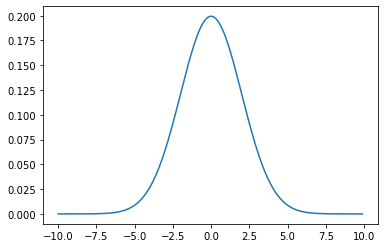

In [12]:
# Use this cell to plot the pdf associated with the gaussian distribution you have generated above
x = np.arange(-10,10,0.1)
g_pdf2 = g.pdf(x)
plt.plot(x, g_pdf2)

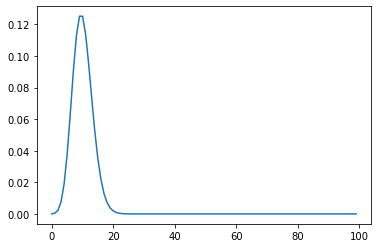

In [26]:
# Let's now do it for a probability mass function 
k = np.arange(100)
pois = scipy.stats.poisson(10) 
plt.plot(k, pois.pmf(k))

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvf(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

**Exercises:** 

- Generate a random sample of n points drawn from the gaussian distribution you defined above. (compare n=10, 100, 1000)
- Plot an histogram with the sample of points you have generated. 
- Plot a canonical gaussian pdf (width =1) and overplot an horizontal line showing its FWHM. 
- Print at the screen the value of the FWHM and compare the value you expect for a canonical 1D-gaussian (FWHM $= 2 * \sqrt{2 * \ln(2)} * \sigma $) 

TIP: Keep the expression of the FWHM of a Gaussian in mind, you may have to use it often. 

In [44]:
# Use this cell to generate a random sample of points drawn from the gaussian distribution you defined above
g = scipy.stats.norm(0, 2)
g_sample_10 = g.rvs(10)
g_sample_100 = g.rvs(100)
g_sample_1000 = g.rvs(1000)

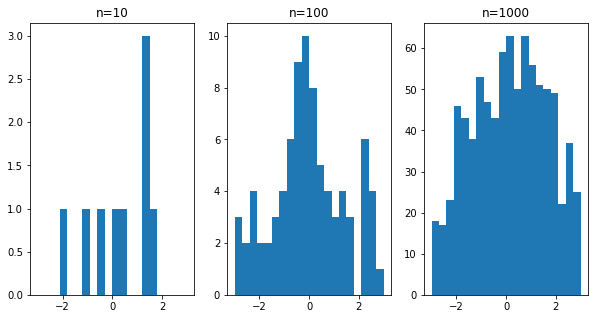

In [49]:
# ploting the histogram 
f, ax = plt.subplots(ncols=3, figsize=(10,5))
number = ['n=10', 'n=100', 'n=1000']
for i, sample in enumerate([g_sample_10, g_sample_100, g_sample_1000]) : 
    plot = ax[i].hist(sample, bins=20, density=False, range=(-3,3))
    ax[i].set_title(number[i])

The value of the FWHM is 2


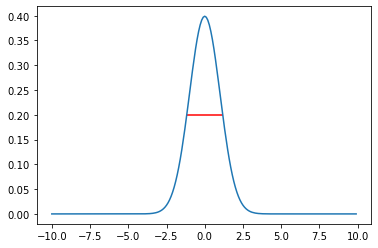

In [65]:
# Illustration of a canonical gaussian pdf and overplot of a line showing its FWHM 
x = np.arange(-10, 10, 0.1)
g_canonical = scipy.stats.norm(0, 1)
gcan_pdf = g_canonical.pdf(x)
plt.plot(x, gcan_pdf)
plt.hlines(gcan_pdf.max()/2., -np.sqrt(2 * np.log(2)), np.sqrt(2 * np.log(2)), color='red')
# As the std here is one we can say
value = 2. * np.sqrt(2 * np.log(2))
print('The value of the FWHM is %i' %value)

### I.4b Bivariate distributions:  <a class="anchor" id="bivariate"></a>

If you want to know more about bivariate PDFs and their python implementation, have a look at the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook. 

### I.5 What is a cumulative density function ? 


The *integral of a pdf* is called **cumulative density function**. 
$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.   

Let's visualise the CDF $H(x_0) = p(X \leq x_0)$, in the case of a gaussian PDF. We see that this is the area below the PDF between $-\infty$ and $x_0$.    

Text(-1.6, 0.1, '$H(x_0) = p(X \\leq x_0)$')

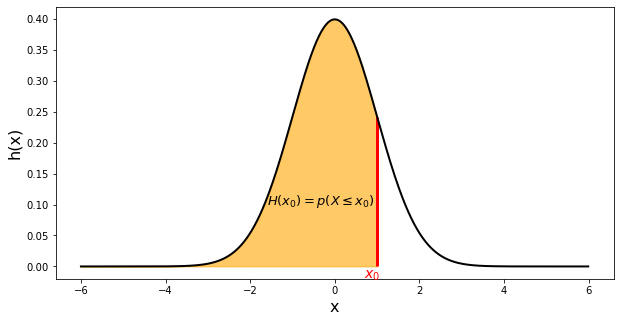

In [66]:
x = np.arange(-6,6,0.01)
x0 = 1.   # let's take x0 = 1 
id_x0 = np.searchsorted(x, x0)
g = scipy.stats.norm(loc=0, scale=1)
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
ax.plot(x, g.pdf(x), color='black', lw=2)
ax.vlines(x0, 0, g.pdf(x0), color='red', lw=3)
ax.fill_between(x[:id_x0], 0, g.pdf(x[:id_x0]), color='orange', alpha=0.6)
ax.set_ylabel('h(x)', size=16)
ax.set_xlabel('x', size=16)
ax.text(0.7, -0.02, r'$x_0$', size=14, color='red')
ax.text(-1.6, 0.1, r'$H(x_0) = p(X \leq x_0)$', size=13)

The CDF provides a direct way to calculate the probability for the value of a random variable $X$ to be between 2 values $x_1$ and $x_2$. If $x_1 < x_2$, then $P(x_1 < X < x_2) = H(x_2) - H(x_1)$. On the above figure, this would be the difference of area up to $x_2$ minus the area up to $x_1$.   

Hence, you know how to derive the *p% quantile* of a distribution. $q_p$ defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution. By definition, the *interquartile range* contains 50% of the surface behind the CDF / PDF and hence 0.5 of the probability (centered on the median). We will see later how to use percentiles to calculate confidence intervals. 

Note that *lowercase* letters are used for probability density (differential distribution) functions (pdf), and upper case for their cumulative counterpart (CDF).

**Example**:

An important CDF is the one of the gaussian distribution:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} ~ \int_{-\infty}^{x} \exp \left( -\frac{1}{2}\frac{(x'-\mu)^2}{\sigma^2}\right) {\rm d}x'. 
$$

This function is generally evaluated in terms of what is called the *Gauss error function* :   
$$
\rm{erf}(z) = \frac{2}{\sqrt{\pi}}~\int_0^z \exp(-t^2)\,{\rm{d}}t.
$$

This function can be evaluated using `scipy.special.erf()`. 

Using the error function, the CDF of a Gaussian distribution can be re-written:

$$
H(x\,|\,\mu, \sigma) = \frac{1}{2}~\left( 1 \pm erf \left( \frac{|x-\mu|}{\sqrt{2}\sigma} \right)  \right),
$$

with "+" sign if $x > \mu$, and "-" sign if $x<\mu$. 

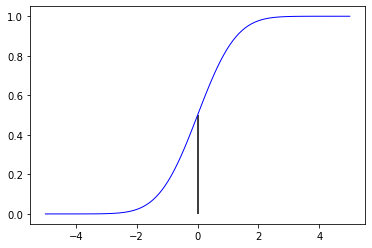

In [67]:
# CDF of a gaussian
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=1, color="blue")
ax.vlines(0, 0,0.5)

*How to read up the percentile / probability from the CDF in python ?*

If you want to know for which value of $x$ we have a given probability/percentile, you may use the "percent point function" or `ppf` (i.e. the inverse of the `cdf`). To know for which $x$ one gets a specific $q$ ($0 < q < 1$), you may use the command: `scipy.stats.distrib.ppf(q)`  (replace `distrib` by the name of the distribution you are interested in). 

**Exercise:**

- Use `ppf` to calculate the interquartile range $q_{75}− q_{25}$ for a Gaussian/Normal distribution   

- Bonus: From the above definition, it is clear that:

$$
p(a < x < b\,| \,\mu, \sigma) = P(b \, | \,\mu, \sigma)-P(a \,| \, \mu, \sigma)
$$

Derive the probability that $p(\mu - M\,\sigma < x < \mu + M \, \sigma)$ for M = 1, 2, 3 and calculates its values with `scipy`. 


In [70]:
# Answer
a = scipy.stats.norm(0,1)
a.ppf([0.25, 0.75])
# So
print('q25 and q75 are %.3f and %.3f' %(a.ppf(0.25), a.ppf(0.75)))
print('So the interquartile value is %.3f' %(a.ppf(0.75) - a.ppf(0.25)))

q25 and q75 are -0.674 and 0.674
So the interquartile value is 1.349


## Intermezo: Descriptive statistics

This section is *not* mandatory if you fulfill the prerequisite for this course. However, if you do not feel confortable with the concepts we have reviewed above, consider runing the following notebooks:     

- To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    

- To **better understand visually the link between PDF and CDF**, and do an interactive tour of the characteristics and properties of **common distributions** encountered in science, then, run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

## Summary 

We have reviewed basic statistical concepts and quantities, and how to use them in python. In particular: 
- basic probability concepts: a sample, an event, a realisation, a conditional probability (i.e. $p(A|B)$ is probability of $A$ given $B$). 
- the probability combination rules. 
- what is a **random variable** (this is a key concept!), and how to generate and manipulate random variable with numpy: `np.random.rand()`, `np.random.seed(value)`, `np.random.randint()`, `np.random.permutation()`
- Probability density function (pdf) and Cumulative density function (CDF) (You *need* to understand what are these functions very well !)
- How to manipulate distributions with `scipy.stats`. For example, to work with a gaussian, and subsequently calculate pdf, cdf, ... drawn from a gaussian distribution, : `g = scipy.stats.norm()` followed by `g.pdf(x)` to get a pdf sampled for values x (single value or array), `g.cdf(x)` for the cdf(), ...
- How to calculate an interquartile range based on the cdf of a function, using the inverse of a cdf, the ppf of percent point function (`scipy.stats.mydistribution.ppf()`). 
- Use `scipy.special()` to calculate special function, in particular `scipy.special.erf()` which is the Gauss error function.  

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* Youtube video about Random variable and PDF: https://www.youtube.com/watch?v=9KVR1hJ8SxI : First 7 minutes
* Youtube video about CDF and its link to PDF: https://www.youtube.com/watch?v=4BswLMKgXzU : First 6 minutes

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

